#IPL(2008-2024) Data Analysis and Winner Prediction

---


#Kaggle Ipl Data EDA

##Data Exploration and Preprocessing (matches.csv)

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We have two Datasets:

Matches.csv <--- Contains matchwise data from 2008-2024

Deliveries.csv <--- Contains Ball by Ball Data of every match from 2008-2024

In [226]:
matches = pd.read_csv('/content/drive/MyDrive/IPL_Winner_Prediction_Project@IDEAS/matches.csv')

###Description of the Dataset

This dataset provides matches information in IPL till 2024. It gives information on teams, cities, date,venues, toss decisions, winers and umpires.

In [227]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [228]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

There are a total of 1095 rows and 20 columns in the dataframe.

There is 1 column with a integer datatype, 3 with float datatype and 16 columns with an object datatype.


In [229]:
matches.isnull().sum().rename('Missing Values')

,Missing Values
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


There are some null or missing values:

*   51 in the city column
*   5 in player of the match column
*   5 in winner column
*   19 in the result margin column
*   3 in target runs column
*   3 in target overs column
*   1074 in the method column





Lets check the null values

In [230]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
399,NaN,Sharjah Cricket Stadium
402,NaN,Dubai International Cricket Stadium
403,NaN,Dubai International Cricket Stadium
404,NaN,Sharjah Cricket Stadium
406,NaN,Sharjah Cricket Stadium
407,NaN,Dubai International Cricket Stadium
408,NaN,Sharjah Cricket Stadium
409,NaN,Dubai International Cricket Stadium
410,NaN,Dubai International Cricket Stadium
413,NaN,Sharjah Cricket Stadium


In [231]:
matches.loc[
    (matches['venue']=='Dubai International Cricket Stadium')
     &
    (matches['city'].isna()),'city' ] = 'Dubai'

matches.loc[
    (matches['venue']=='Sharjah Cricket Stadium')
     &
    (matches['city'].isna()),'city' ] = 'Sharjah'

So we have replaced all the missing city values

In [232]:
matches[matches['player_of_match'].isnull()][['player_of_match','result']]

,player_of_match,result
241,NaN,no result
485,NaN,no result
511,NaN,no result
744,NaN,no result
994,NaN,no result


In [233]:
matches[matches['winner'].isnull()][['player_of_match','result']]

,player_of_match,result
241,NaN,no result
485,NaN,no result
511,NaN,no result
744,NaN,no result
994,NaN,no result


There were 5 matches where there was no result and for those corresponding matches we do not have any winner or player of the match

In [234]:
matches[matches['result_margin'].isnull()][['result_margin','result']]

,result_margin,result
66,NaN,tie
130,NaN,tie
241,NaN,no result
328,NaN,tie
342,NaN,tie
416,NaN,tie
475,NaN,tie
485,NaN,no result
511,NaN,no result
610,NaN,tie


For the matches that had no result or tie we have no margin

In [235]:
matches[matches['target_runs'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [236]:
matches[matches['target_overs'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


For the above 3 matches no over were bowled so we do not have target runs or target overs.

In [237]:
matches[matches['method'].isnull()][['result','method']]

,result,method
0,runs,NaN
1,runs,NaN
2,wickets,NaN
3,wickets,NaN
4,wickets,NaN
...,...,...
1090,wickets,NaN
1091,wickets,NaN
1092,wickets,NaN
1093,runs,NaN


NaN in the method column indicates the matches where D/L was not applied

In [238]:
matches.describe(include='all')

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
count,1.095000e+03,1095,1095,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1076.000000,1092.000000,1092.000000,1095,21,1095,1095
unique,NaN,17,36,823,8,291,58,19,19,19,2,19,4,NaN,NaN,NaN,2,1,62,62
top,NaN,2013,Mumbai,2008-04-26,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,NaN,NaN,N,D/L,AK Chaudhary,S Ravi
freq,NaN,76,173,2,1029,25,77,135,138,143,704,144,578,NaN,NaN,NaN,1081,21,115,83
mean,9.048283e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.259294,165.684066,19.759341,NaN,NaN,NaN,NaN
std,3.677402e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.787444,33.427048,1.581108,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,43.000000,5.000000,NaN,NaN,NaN,NaN
25%,5.483315e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,146.000000,20.000000,NaN,NaN,NaN,NaN
50%,9.809610e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,166.000000,20.000000,NaN,NaN,NaN,NaN
75%,1.254062e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,187.000000,20.000000,NaN,NaN,NaN,NaN


In [239]:
matches['winner'].value_counts()

,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112
Sunrisers Hyderabad,88
Kings XI Punjab,88
Delhi Daredevils,67
Delhi Capitals,48


Some teams names are twice due to their team name change over the years so we need to clean them

In [240]:
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

matches['team1'] = matches['team1'].replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].replace('Delhi Daredevils', 'Delhi Capitals')
matches['winner'] = matches['winner'].replace('Delhi Daredevils', 'Delhi Capitals')

matches['team1'] = matches['team1'].replace('Kings XI Punjab', 'Punjab Kings')
matches['team2'] = matches['team2'].replace('Kings XI Punjab', 'Punjab Kings')
matches['winner'] = matches['winner'].replace('Kings XI Punjab', 'Punjab Kings')

matches['team1'] = matches['team1'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['team2'] = matches['team2'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['winner'] = matches['winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['team1'] = matches['team1'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
matches['team2'] = matches['team2'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
matches['winner'] = matches['winner'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

matches['winner'].value_counts()

,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bengaluru,123
Sunrisers Hyderabad,117
Delhi Capitals,115
Punjab Kings,112
Rajasthan Royals,112
Gujarat Titans,28


We have 36 unique cities but 58 unique venues so lets find out the cities with multiple venues

In [241]:
matches.groupby(['city','venue']).count()['season']

city            venue                                                                
Abu Dhabi       Sheikh Zayed Stadium                                                     29
                Zayed Cricket Stadium, Abu Dhabi                                          8
Ahmedabad       Narendra Modi Stadium, Ahmedabad                                         24
                Sardar Patel Stadium, Motera                                             12
Bangalore       M Chinnaswamy Stadium                                                    65
Bengaluru       M Chinnaswamy Stadium, Bengaluru                                         14
                M.Chinnaswamy Stadium                                                    15
Bloemfontein    OUTsurance Oval                                                           2
Cape Town       Newlands                                                                  7
Centurion       SuperSport Park                                                          12
Chandigarh      Punjab Cricket Association IS Bindra Stadium                             10
                Punjab Cricket Association IS Bindra Stadium, Mohali                     11
                Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh          5
                Punjab Cricket Association Stadium, Mohali                               35
Chennai         MA Chidambaram Stadium                                                    9
                MA Chidambaram Stadium, Chepauk                                          48
                MA Chidambaram Stadium, Chepauk, Chennai                                 28
Cuttack         Barabati Stadium                                                          7
Delhi           Arun Jaitley Stadium                                                     14
                Arun Jaitley Stadium, Delhi                                              16
                Feroz Shah Kotla                                                         60
Dharamsala      Himachal Pradesh Cricket Association Stadium                              9
                Himachal Pradesh Cricket Association Stadium, Dharamsala                  4
Dubai           Dubai International Cricket Stadium                                      46
Durban          Kingsmead                                                                15
East London     Buffalo Park                                                              3
Guwahati        Barsapara Cricket Stadium, Guwahati                                       3
Hyderabad       Rajiv Gandhi International Stadium                                       15
                Rajiv Gandhi International Stadium, Uppal                                49
                Rajiv Gandhi International Stadium, Uppal, Hyderabad                     13
Indore          Holkar Cricket Stadium                                                    9
Jaipur          Sawai Mansingh Stadium                                                   47
                Sawai Mansingh Stadium, Jaipur                                           10
Johannesburg    New Wanderers Stadium                                                     8
Kanpur          Green Park                                                                4
Kimberley       De Beers Diamond Oval                                                     3
Kochi           Nehru Stadium                                                             5
Kolkata         Eden Gardens                                                             77
                Eden Gardens, Kolkata                                                    16
Lucknow         Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    14
Mohali          Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur        5
Mumbai          Brabourne Stadium                                                        10
                Brabourne Stadium, Mumbai         

Many Stadium names have duplicate names although they are same so we have to clean them

In [242]:
matches['city']=matches['city'].replace({'Bangalore':'Bengaluru'})
matches['city']=matches['city'].replace({'Chandigarh':'Mohali'})


matches['venue'] = matches['venue'].replace({'Zayed Cricket Stadium, Abu Dhabi': 'Sheikh Zayed Stadium',
                                            'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
                                            'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
                                            'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
                                            'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium',
                                            'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
                                            'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
                                            'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
                                            'Feroz Shah Kotla': 'Arun Jaitley Stadium',
                                            'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
                                            'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
                                            'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
                                            'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
                                            'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
                                            'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
                                            'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
                                            'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
                                            'Eden Gardens, Kolkata': 'Eden Gardens',
                                            'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
                                            'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'},
                                            )


In [243]:
print(matches['team1'].nunique())
print(matches['team2'].nunique())

14
14


In [244]:
matches['season'] = matches["season"].replace("2007/08","2008")

matches['season'] = matches["season"].replace("2009/10","2010")

matches['season'] = matches["season"].replace("2020/21","2020")

<Axes: xlabel='winner'>

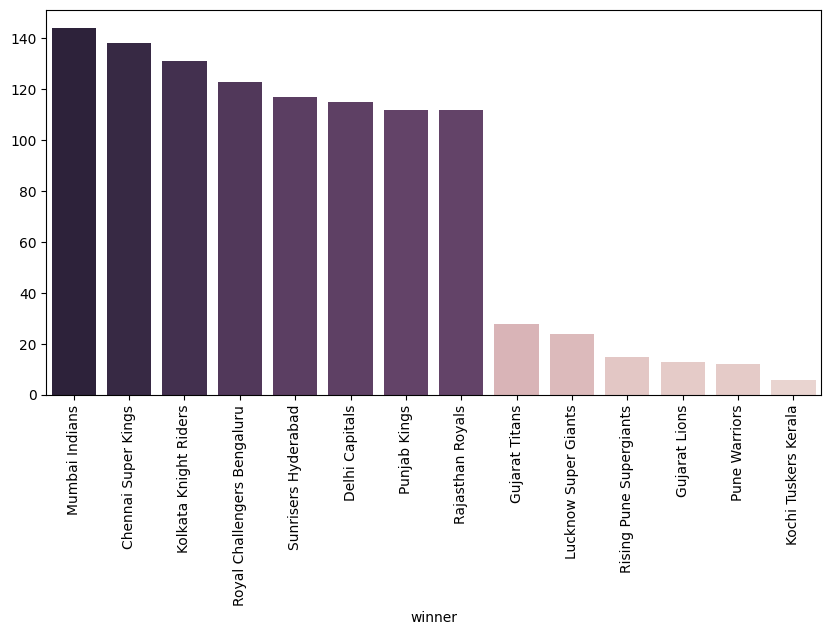

In [245]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
winner_count=matches['winner'].value_counts().sort_values(ascending=False)
sns.barplot(x=winner_count.index, y=winner_count.values, hue=winner_count.values,legend=False)

In [246]:
# matches.to_excel('/content/drive/MyDrive/IPL_Winner_Prediction_Project@IDEAS/matches_power_bi.xlsx', index=False,header=True)

In [247]:
match_df=matches #for ml
match_df1=matches #for ml1

##Data Exploration and Preprocessing (deliveries.csv)

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [249]:
# from google.colab import drive
# drive.mount('/content/drive')

In [250]:
deliveries = pd.read_csv('/content/drive/MyDrive/IPL_Winner_Prediction_Project@IDEAS/deliveries.csv')

In [251]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [252]:
deliveries.shape

(260920, 17)

In [253]:
deliveries.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [254]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

There are a total of 260920 rows and 17 columns in the dataframe.

There is 1 column with a integer datatype, 3 with float datatype and 16 columns with an object datatype.

In [255]:
deliveries.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
count,2.609200e+05,260920.000000,260920,260920,260920.000000,260920.000000,260920,260920,260920,260920.000000,260920.000000,260920.000000,14125,260920.000000,12950,12950,9354
unique,NaN,NaN,19,19,NaN,NaN,673,530,663,NaN,NaN,NaN,5,NaN,629,10,607
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,R Ashwin,V Kohli,NaN,NaN,NaN,wides,NaN,RG Sharma,caught,MS Dhoni
freq,NaN,NaN,31437,31505,NaN,NaN,6236,4679,6067,NaN,NaN,NaN,8380,NaN,223,8063,220
mean,9.070665e+05,1.483531,NaN,NaN,9.197677,3.624486,NaN,NaN,NaN,1.265001,0.067806,1.332807,NaN,0.049632,NaN,NaN,NaN
std,3.679913e+05,0.502643,NaN,NaN,5.683484,1.814920,NaN,NaN,NaN,1.639298,0.343265,1.626416,NaN,0.217184,NaN,NaN,NaN
min,3.359820e+05,1.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,5.483340e+05,1.000000,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
50%,9.809670e+05,1.000000,NaN,NaN,9.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
75%,1.254066e+06,2.000000,NaN,NaN,14.000000,5.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN


In [256]:
deliveries.isna().sum().rename('Missing Values')

,Missing Values
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


There are missing values in extras_type,player_dismissed and dismissal_kind

In [257]:
deliveries['extras_type'].value_counts()

,count
extras_type,
wides,8380
legbyes,4001
noballs,1069
byes,673
penalty,2


Here the missing values represent that there were no extra runs in a particular ball

In [258]:
deliveries[deliveries['player_dismissed'].isna()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [259]:
deliveries[deliveries['dismissal_kind'].isna()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


Here the missing values represent that no player has been dismissed

In [260]:
deliveries['batting_team'].value_counts()

,count
batting_team,
Mumbai Indians,31437
Kolkata Knight Riders,29514
Chennai Super Kings,28651
Royal Challengers Bangalore,28205
Rajasthan Royals,26242
Kings XI Punjab,22646
Sunrisers Hyderabad,21843
Delhi Daredevils,18786
Delhi Capitals,10946


In [261]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

deliveries['batting_team'] = deliveries['batting_team'].replace('Delhi Daredevils', 'Delhi Capitals')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Delhi Daredevils', 'Delhi Capitals')

deliveries['batting_team'] = deliveries['batting_team'].replace('Kings XI Punjab', 'Punjab Kings')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Kings XI Punjab', 'Punjab Kings')

deliveries['batting_team'] = deliveries['batting_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')

deliveries['batting_team'] = deliveries['batting_team'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

deliveries['batting_team'].value_counts()

,count
batting_team,
Mumbai Indians,31437
Sunrisers Hyderabad,30877
Royal Challengers Bengaluru,30023
Delhi Capitals,29732
Kolkata Knight Riders,29514
Punjab Kings,29479
Chennai Super Kings,28651
Rajasthan Royals,26242
Gujarat Titans,5494


In [262]:
deliveries_df =deliveries #for ml use
deliveries_df1 =deliveries #for ml1 use

In [263]:
deliveries.groupby('batter').sum()['batsman_runs'].sort_values(ascending=False).head(20)

,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536
MS Dhoni,5243
AB de Villiers,5181
CH Gayle,4997
RV Uthappa,4954


In [264]:
deliveries["4"]=deliveries["batsman_runs"].apply(lambda x: 1 if x==4 else 0)
deliveries["6"]=deliveries["batsman_runs"].apply(lambda x: 1 if x==6 else 0)

In [265]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,0,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,0,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0


In [266]:
dismissal_types = {"bowled", "caught", "caught and bowled", "hit wicket", "lbw", "stumped"}
deliveries['wicket'] = deliveries['dismissal_kind'].apply(lambda x: 1 if x in dismissal_types else 0)

In [267]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,0,0,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,0,0,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [268]:
deliveries['wicket'].value_counts()

,count
wicket,
0,249105
1,11815


In [269]:
deliveries.groupby('bowler').sum()['wicket'].sort_values(ascending=False).head(20)

,wicket
bowler,
YS Chahal,205
PP Chawla,192
DJ Bravo,183
B Kumar,181
SP Narine,180
R Ashwin,180
A Mishra,174
SL Malinga,170
JJ Bumrah,168


In [270]:
# deliveries.to_excel('/content/drive/MyDrive/IPL_Winner_Prediction_Project@IDEAS/deliveries_power_bi.xlsx', index=False,header=True)

#Winner Probability Predictor


In [271]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Mohali,2008-04-19,League,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,MA Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [272]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,0,0,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,0,0,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [273]:
deliveries_df.rename(columns={'match_id':'id'},inplace=True)

In [274]:
# deliveries_df.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [275]:
teams = ['Kolkata Knight Riders',
         'Chennai Super Kings',
         'Punjab Kings',
         'Rajasthan Royals',
         'Mumbai Indians',
         'Delhi Capitals',
         'Royal Challengers Bengaluru',
         'Sunrisers Hyderabad',
         'Lucknow Super Giants',
         'Gujarat Titans'
         ]

In [276]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [277]:
match_df.shape

(980, 20)

In [278]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [279]:
match_df = match_df[['id','city','winner','target_runs', 'team1', 'team2']]

In [280]:
second_innings = match_df.merge(deliveries_df,on='id')

In [281]:
second_innings

,id,city,winner,target_runs,team1,team2,inning,batting_team,bowling_team,over,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
0,335982,Bengaluru,Kolkata Knight Riders,223.0,Royal Challengers Bengaluru,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,...,1,1,legbyes,0,NaN,NaN,NaN,0,0,0
1,335982,Bengaluru,Kolkata Knight Riders,223.0,Royal Challengers Bengaluru,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
2,335982,Bengaluru,Kolkata Knight Riders,223.0,Royal Challengers Bengaluru,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,...,1,1,wides,0,NaN,NaN,NaN,0,0,0
3,335982,Bengaluru,Kolkata Knight Riders,223.0,Royal Challengers Bengaluru,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
4,335982,Bengaluru,Kolkata Knight Riders,223.0,Royal Challengers Bengaluru,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,114.0,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233897,1426312,Chennai,Kolkata Knight Riders,114.0,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233898,1426312,Chennai,Kolkata Knight Riders,114.0,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233899,1426312,Chennai,Kolkata Knight Riders,114.0,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [282]:
second_innings = second_innings[second_innings['inning']==2]
second_innings.shape

(112805, 25)

In [283]:
second_innings['target_runs']=second_innings['target_runs'].astype(int)

<ipython-input-283-bed8ee09404a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['target_runs']=second_innings['target_runs'].astype(int)


In [284]:
second_innings

,id,city,winner,target_runs,team1,team2,inning,batting_team,bowling_team,over,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
124,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
125,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,1,1,wides,0,NaN,NaN,NaN,0,0,0
126,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
127,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
128,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,Kolkata Knight Riders,114,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233897,1426312,Chennai,Kolkata Knight Riders,114,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233898,1426312,Chennai,Kolkata Knight Riders,114,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233899,1426312,Chennai,Kolkata Knight Riders,114,Sunrisers Hyderabad,Kolkata Knight Riders,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [285]:
second_innings['bowling_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Royal Challengers Bengaluru', 'Delhi Capitals',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [286]:
second_innings[second_innings['winner'].isna()]

,id,city,winner,target_runs,team1,team2,inning,batting_team,bowling_team,over,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
107450,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
107451,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
107452,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
107453,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
107454,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
107455,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
107456,829813,Bengaluru,NaN,188,Royal Challengers Bengaluru,Delhi Capitals,2,Royal Challengers Bengaluru,Delhi Capitals,1,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
149404,1178424,Bengaluru,NaN,63,Royal Challengers Bengaluru,Rajasthan Royals,2,Rajasthan Royals,Royal Challengers Bengaluru,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
149405,1178424,Bengaluru,NaN,63,Royal Challengers Bengaluru,Rajasthan Royals,2,Rajasthan Royals,Royal Challengers Bengaluru,0,...,0,6,NaN,0,NaN,NaN,NaN,0,1,0
149406,1178424,Bengaluru,NaN,63,Royal Challengers Bengaluru,Rajasthan Royals,2,Rajasthan Royals,Royal Challengers Bengaluru,0,...,0,4,NaN,0,NaN,NaN,NaN,1,0,0


In [287]:
second_innings.head()

,id,city,winner,target_runs,team1,team2,inning,batting_team,bowling_team,over,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
124,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
125,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,1,1,wides,0,NaN,NaN,NaN,0,0,0
126,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
127,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
128,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [288]:
second_innings = second_innings.dropna(subset=['winner'])

In [289]:
second_innings['current_Score'] = second_innings.groupby('id')['total_runs'].cumsum()

<ipython-input-289-64cb68637f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['current_Score'] = second_innings.groupby('id')['total_runs'].cumsum()


In [290]:
second_innings['runs_left'] = second_innings['target_runs'] - second_innings['current_Score']

<ipython-input-290-7502636002be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['runs_left'] = second_innings['target_runs'] - second_innings['current_Score']


In [291]:
second_innings['legal_delivery'] = ~second_innings['extras_type'].isin(['wides', 'noballs'])
second_innings['legal_balls_bowled'] = second_innings.groupby('id')['legal_delivery'].cumsum()
second_innings['balls_left'] = 120 - second_innings['legal_balls_bowled']

<ipython-input-291-72596d4ef823>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['legal_delivery'] = ~second_innings['extras_type'].isin(['wides', 'noballs'])
<ipython-input-291-72596d4ef823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['legal_balls_bowled'] = second_innings.groupby('id')['legal_delivery'].cumsum()
<ipython-input-291-72596d4ef823>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [292]:
check = ['current_Score', 'runs_left', 'balls_left']
negative_counts = second_innings[check].lt(0).sum()
negative_counts

,0
current_Score,0
runs_left,323
balls_left,6


In [293]:
wickets = second_innings.groupby('id')['is_wicket'].cumsum()
second_innings['wickets_remaining'] = 10-wickets
second_innings.head(10)

<ipython-input-293-61277b8ec34b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['wickets_remaining'] = 10-wickets


,id,city,winner,target_runs,team1,team2,inning,batting_team,bowling_team,over,...,fielder,4,6,wicket,current_Score,runs_left,legal_delivery,legal_balls_bowled,balls_left,wickets_remaining
124,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,1,222,True,1,119,10
125,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,2,221,False,1,119,10
126,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,2,221,True,2,118,10
127,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,3,220,True,3,117,10
128,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,4,219,True,4,116,10
129,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,4,219,True,5,115,10
130,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,...,NaN,0,0,0,4,219,True,6,114,10
131,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,1,...,NaN,0,0,1,4,219,True,7,113,9
132,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,1,...,NaN,0,0,0,4,219,True,8,112,9
133,335982,Bengaluru,Kolkata Knight Riders,223,Royal Challengers Bengaluru,Kolkata Knight Riders,2,Royal Challengers Bengaluru,Kolkata Knight Riders,1,...,NaN,0,0,0,8,215,True,9,111,9


In [294]:
second_innings['crr'] = round(second_innings['current_Score'] / ((120 - second_innings['balls_left']) / 6), 2)
second_innings['rrr'] = round(second_innings['runs_left'] / (second_innings['balls_left'] / 6), 2)
second_innings[second_innings['id']==1312200]

<ipython-input-294-d2a4c0f77331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['crr'] = round(second_innings['current_Score'] / ((120 - second_innings['balls_left']) / 6), 2)
<ipython-input-294-d2a4c0f77331>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_innings['rrr'] = round(second_innings['runs_left'] / (second_innings['balls_left'] / 6), 2)


,id,city,winner,target_runs,team1,team2,inning,batting_team,bowling_team,over,...,6,wicket,current_Score,runs_left,legal_delivery,legal_balls_bowled,balls_left,wickets_remaining,crr,rrr
198822,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,0,...,0,0,0,131,True,1,119,10,0.00,6.61
198823,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,0,...,0,0,0,131,True,2,118,10,0.00,6.66
198824,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,0,...,0,0,1,130,True,3,117,10,2.00,6.67
198825,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,0,...,0,0,1,130,True,4,116,10,1.50,6.72
198826,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,0,...,0,0,1,130,True,5,115,10,1.20,6.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,17,...,0,0,124,7,True,105,15,7,7.09,2.80
198931,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,17,...,0,0,124,7,True,106,14,7,7.02,3.00
198932,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,17,...,0,0,125,6,True,107,13,7,7.01,2.77
198933,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,Gujarat Titans,Rajasthan Royals,17,...,0,0,127,4,True,108,12,7,7.06,2.00


In [295]:
required_data = second_innings[['batting_team','bowling_team','city','runs_left','balls_left','wickets_remaining','target_runs','crr','rrr','winner']]
required_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,target_runs,crr,rrr,winner
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,222,119,10,223,6.00,11.19,Kolkata Knight Riders
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,221,119,10,223,12.00,11.14,Kolkata Knight Riders
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,221,118,10,223,6.00,11.24,Kolkata Knight Riders
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,220,117,10,223,6.00,11.28,Kolkata Knight Riders
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,219,116,10,223,6.00,11.33,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...
233896,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,8,114,11.19,0.39,Kolkata Knight Riders
233897,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,8,114,11.10,0.30,Kolkata Knight Riders
233898,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,8,114,11.02,0.20,Kolkata Knight Riders
233899,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,8,114,10.94,0.10,Kolkata Knight Riders


In [296]:
required_data['winner']=required_data.apply(lambda x: 1 if x['winner']==x['batting_team'] else 0,axis=1)

<ipython-input-296-303ae0b51dc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['winner']=required_data.apply(lambda x: 1 if x['winner']==x['batting_team'] else 0,axis=1)


In [297]:
required_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,target_runs,crr,rrr,winner
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,222,119,10,223,6.00,11.19,0
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,221,119,10,223,12.00,11.14,0
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,221,118,10,223,6.00,11.24,0
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,220,117,10,223,6.00,11.28,0
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,219,116,10,223,6.00,11.33,0
...,...,...,...,...,...,...,...,...,...,...
233896,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,8,114,11.19,0.39,1
233897,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,8,114,11.10,0.30,1
233898,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,8,114,11.02,0.20,1
233899,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,8,114,10.94,0.10,1


In [298]:
required_data = required_data.replace([np.inf, -np.inf], np.nan)
required_data = required_data.dropna()

In [299]:
required_data = required_data[required_data['crr'] >= 0]

In [300]:
columns_to_check = ['runs_left', 'balls_left', 'wickets_remaining', 'target_runs', 'crr', 'rrr', 'winner']

required_data = required_data[~(required_data[columns_to_check] < 0).any(axis=1)]

In [301]:
numeric = required_data[['runs_left', 'balls_left', 'wickets_remaining', 'target_runs', 'crr', 'rrr', 'winner']]
has_infinite_values = np.any(np.isinf(numeric))

has_negative_values = (numeric < 0).any().any()
has_null_values = numeric.isnull().any().any()

print(f"Has Infinite Values: {has_infinite_values}")
print(f"Has Negative Values: {has_negative_values}")
print(f"Has Null Values: {has_null_values}")

Has Infinite Values: False
Has Negative Values: False
Has Null Values: False


In [302]:
required_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,target_runs,crr,rrr,winner
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,222,119,10,223,6.00,11.19,0
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,221,119,10,223,12.00,11.14,0
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,221,118,10,223,6.00,11.24,0
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,220,117,10,223,6.00,11.28,0
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,219,116,10,223,6.00,11.33,0
...,...,...,...,...,...,...,...,...,...,...
233896,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,8,114,11.19,0.39,1
233897,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,8,114,11.10,0.30,1
233898,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,8,114,11.02,0.20,1
233899,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,8,114,10.94,0.10,1


In [303]:
from sklearn.model_selection import train_test_split

In [304]:
x = required_data.iloc[:, :-1]
y = required_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remaining,target_runs,crr,rrr
151060,Mumbai Indians,Kolkata Knight Riders,Mumbai,8,26,9,134,8.04,1.85
133883,Punjab Kings,Kolkata Knight Riders,Indore,105,36,5,246,10.07,17.50
102664,Chennai Super Kings,Sunrisers Hyderabad,Hyderabad,90,50,7,193,8.83,10.80
188303,Kolkata Knight Riders,Rajasthan Royals,Mumbai,70,43,8,218,11.53,9.77
45154,Chennai Super Kings,Mumbai Indians,Mumbai,23,5,1,165,7.41,27.60


In [305]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],
remainder='passthrough')

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [307]:
from sklearn.ensemble import RandomForestClassifier

pipe1 = Pipeline([
    ('step1', trf),
    ('step2', RandomForestClassifier(n_estimators=200,random_state=42))
])

In [308]:
pipe.fit(x_train,y_train)
pipe1.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [309]:
y_pred = pipe.predict(x_test)
y_pred1 = pipe1.predict(x_test)

In [310]:
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test,y_pred)
a2 = accuracy_score(y_test,y_pred1)

In [311]:
print(f"Accuracy score (Logistic Regression): {a1}")
print(f"Accuracy score (Random Forest Classifier): {a2}")

Accuracy score (Logistic Regression): 0.7991519750055791
Accuracy score (Random Forest Classifier): 0.9981254184333854


In [312]:
# import joblib
# joblib.dump(pipe, 'model.pkl')

#First Innings Score Predictor

In [313]:
match_df1

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Mohali,2008-04-19,League,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,MA Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [314]:
deliveries_df1

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,0,0,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,0,0,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [315]:
deliveries_df1.rename(columns={'match_id':'id'},inplace=True)

In [316]:
teams = ['Kolkata Knight Riders',
         'Chennai Super Kings',
         'Punjab Kings',
         'Rajasthan Royals',
         'Mumbai Indians',
         'Delhi Capitals',
         'Royal Challengers Bengaluru',
         'Sunrisers Hyderabad',
         'Lucknow Super Giants',
         'Gujarat Titans'
         ]

In [317]:
match_df1 = match_df1[match_df1['team1'].isin(teams)]
match_df1 = match_df1[match_df1['team2'].isin(teams)]

In [318]:
match_df1['First_innings_score']=match_df1['target_runs']-1

In [319]:
match_df1 = match_df1[['id','city','First_innings_score']]

In [320]:
match_df1

,id,city,First_innings_score
0,335982,Bengaluru,222.0
1,335983,Mohali,240.0
2,335984,Delhi,129.0
3,335985,Mumbai,165.0
4,335986,Kolkata,110.0
...,...,...,...
1090,1426307,Hyderabad,214.0
1091,1426309,Ahmedabad,159.0
1092,1426310,Ahmedabad,172.0
1093,1426311,Chennai,175.0


In [321]:
deliveries_new = match_df1.merge(deliveries_df1,on='id')

In [322]:
deliveries_new

,id,city,First_innings_score,inning,batting_team,bowling_team,over,ball,batter,bowler,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,4,6,wicket
0,335982,Bengaluru,222.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,...,1,1,legbyes,0,NaN,NaN,NaN,0,0,0
1,335982,Bengaluru,222.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
2,335982,Bengaluru,222.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,...,1,1,wides,0,NaN,NaN,NaN,0,0,0
3,335982,Bengaluru,222.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
4,335982,Bengaluru,222.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,...,0,0,NaN,0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233896,1426312,Chennai,113.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233897,1426312,Chennai,113.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233898,1426312,Chennai,113.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0
233899,1426312,Chennai,113.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,...,0,1,NaN,0,NaN,NaN,NaN,0,0,0


In [323]:
first_innings = deliveries_new[deliveries_new['inning']==1]

In [324]:
first_innings['First_innings_score'].isnull().sum()

np.int64(246)

In [325]:
# first_innings['First_innings_score']=first_innings['First_innings_score'].astype(int)

In [326]:
first_innings['current_Score'] =first_innings.groupby('id')['total_runs'].cumsum()

<ipython-input-326-c8593bcc3769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['current_Score'] =first_innings.groupby('id')['total_runs'].cumsum()


In [327]:
first_innings['First_innings_score'] = pd.to_numeric(first_innings['First_innings_score'], errors='coerce').astype('Int64')

<ipython-input-327-84551edc8f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['First_innings_score'] = pd.to_numeric(first_innings['First_innings_score'], errors='coerce').astype('Int64')


In [328]:
first_innings['legal_delivery'] = ~first_innings['extras_type'].isin(['wides', 'noballs'])
first_innings['legal_balls_bowled'] = first_innings.groupby('id')['legal_delivery'].cumsum()
first_innings['balls_left'] = 120 - first_innings['legal_balls_bowled']

<ipython-input-328-9ab4e4d42fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['legal_delivery'] = ~first_innings['extras_type'].isin(['wides', 'noballs'])
<ipython-input-328-9ab4e4d42fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['legal_balls_bowled'] = first_innings.groupby('id')['legal_delivery'].cumsum()
<ipython-input-328-9ab4e4d42fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [329]:
check = ['current_Score','balls_left']
negative_counts = first_innings[check].lt(0).sum()
negative_counts

,0
current_Score,0
balls_left,13


In [330]:
wickets = first_innings.groupby('id')['is_wicket'].cumsum()
first_innings['wickets_remaining'] = 10-wickets
first_innings

<ipython-input-330-88b84c8c5870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['wickets_remaining'] = 10-wickets


,id,city,First_innings_score,inning,batting_team,bowling_team,over,ball,batter,bowler,...,dismissal_kind,fielder,4,6,wicket,current_Score,legal_delivery,legal_balls_bowled,balls_left,wickets_remaining
0,335982,Bengaluru,222,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,...,NaN,NaN,0,0,0,1,True,1,119,10
1,335982,Bengaluru,222,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,...,NaN,NaN,0,0,0,1,True,2,118,10
2,335982,Bengaluru,222,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,...,NaN,NaN,0,0,0,2,False,2,118,10
3,335982,Bengaluru,222,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,...,NaN,NaN,0,0,0,2,True,3,117,10
4,335982,Bengaluru,222,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,...,NaN,NaN,0,0,0,2,True,4,116,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233829,1426312,Chennai,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,...,lbw,NaN,0,0,1,113,True,107,13,1
233830,1426312,Chennai,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,...,NaN,NaN,0,0,0,113,True,108,12,1
233831,1426312,Chennai,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,...,NaN,NaN,0,0,0,113,True,109,11,1
233832,1426312,Chennai,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,...,NaN,NaN,0,0,0,113,True,110,10,1


In [331]:
first_innings['runs_last_30'] = (
    first_innings.groupby('id')['total_runs']
    .rolling(window=30, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)

<ipython-input-331-37d3b385ae05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['runs_last_30'] = (


In [332]:
first_innings['crr'] = round(first_innings['current_Score'] / ((120 - first_innings['balls_left']) / 6), 2)

<ipython-input-332-d870b1510e35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_innings['crr'] = round(first_innings['current_Score'] / ((120 - first_innings['balls_left']) / 6), 2)


In [333]:
required_data1 = first_innings[['batting_team','bowling_team','city','current_Score','balls_left','wickets_remaining','crr','runs_last_30','First_innings_score']]
required_data1

,batting_team,bowling_team,city,current_Score,balls_left,wickets_remaining,crr,runs_last_30,First_innings_score
0,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,1,119,10,6.00,1.0,222
1,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,1,118,10,3.00,1.0,222
2,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,118,10,6.00,2.0,222
3,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,117,10,4.00,2.0,222
4,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,116,10,3.00,2.0,222
...,...,...,...,...,...,...,...,...,...
233829,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,13,1,6.34,32.0,113
233830,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,12,1,6.28,31.0,113
233831,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,11,1,6.22,27.0,113
233832,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,10,1,6.16,26.0,113


In [334]:
required_data1 = required_data1.replace([np.inf, -np.inf], np.nan)
required_data1 = required_data1.dropna()

In [335]:
columns_to_check1 = ['balls_left', 'wickets_remaining', 'First_innings_score', 'runs_last_30','crr','current_Score']

required_data1 = required_data1[~(required_data1[columns_to_check1] < 0).any(axis=1)]

In [336]:
numeric = required_data1[['balls_left', 'wickets_remaining', 'First_innings_score', 'runs_last_30','crr','current_Score']]
has_infinite_values = np.any(np.isinf(numeric))

has_negative_values = (numeric < 0).any().any()
has_null_values = numeric.isnull().any().any()

print(f"Has Infinite Values: {has_infinite_values}")
print(f"Has Negative Values: {has_negative_values}")
print(f"Has Null Values: {has_null_values}")

Has Infinite Values: False
Has Negative Values: False
Has Null Values: False


In [337]:
required_data1

,batting_team,bowling_team,city,current_Score,balls_left,wickets_remaining,crr,runs_last_30,First_innings_score
0,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,1,119,10,6.00,1.0,222
1,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,1,118,10,3.00,1.0,222
2,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,118,10,6.00,2.0,222
3,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,117,10,4.00,2.0,222
4,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,116,10,3.00,2.0,222
...,...,...,...,...,...,...,...,...,...
233829,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,13,1,6.34,32.0,113
233830,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,12,1,6.28,31.0,113
233831,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,11,1,6.22,27.0,113
233832,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,10,1,6.16,26.0,113


In [338]:
from sklearn.model_selection import train_test_split

In [339]:
x = required_data1.iloc[:, :-1]
y = required_data1.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [340]:
x

,batting_team,bowling_team,city,current_Score,balls_left,wickets_remaining,crr,runs_last_30
0,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,1,119,10,6.00,1.0
1,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,1,118,10,3.00,1.0
2,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,118,10,6.00,2.0
3,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,117,10,4.00,2.0
4,Kolkata Knight Riders,Royal Challengers Bengaluru,Bengaluru,2,116,10,3.00,2.0
...,...,...,...,...,...,...,...,...
233829,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,13,1,6.34,32.0
233830,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,12,1,6.28,31.0
233831,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,11,1,6.22,27.0
233832,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,113,10,1,6.16,26.0


In [341]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],
remainder='passthrough')

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
modela1 = Pipeline(steps=[
    ('preprocessor', trf),
    ('regressor', LinearRegression())
])

In [365]:
from sklearn.ensemble import RandomForestRegressor

modela2 = Pipeline(steps=[
    ('preprocessor', trf),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [344]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

modela3 = Pipeline([
    ('transformer', trf),
    ('model', xgb)
])

In [366]:
modela1.fit(x_train, y_train)
modela2.fit(x_train, y_train)
modela3.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_round...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [367]:
y_preda1 = modela1.predict(x_test)
y_preda2 = modela2.predict(x_test)
y_preda3 = modela3.predict(x_test)

In [368]:
from sklearn.metrics import r2_score
r2a1 = r2_score(y_test, y_preda1)
r2a2 = r2_score(y_test, y_preda2)
r2a3 = r2_score(y_test, y_preda3)
print(f"R-squared score (Linear Regression): {r2a1}")
print(f"R-squared score (Random Forest Regressor): {r2a2}")
print(f"R-squared score (XgBoost Regressor): {r2a3}")

R-squared score (Linear Regression): 0.5084836676599271
R-squared score (Random Forest Regressor): 0.8808895477529517
R-squared score (XgBoost Regressor): 0.5858144760131836


In [363]:
# import joblib
# joblib.dump(modela2, 'model_1.pkl')

['model_1.pkl']

In [364]:
# import shutil
# shutil.copy("model_1.pkl", "/content/drive/MyDrive/")

'/content/drive/MyDrive/model_1.pkl'